In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

In [2]:
#import dataset
df = pd.read_csv('project_dataset - project_dataset.csv')
df

,EmployeeID,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
1,2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
2,4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
3,5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
4,7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,Travel_Frequently,2571,4,7713,Research & Development,23,2,Medical,3,Male,Laboratory Technician,Married,3,3,5,0,No,No
1466,2062,39,Travel_Rarely,9991,1,29973,Research & Development,6,1,Medical,4,Male,Healthcare Representative,Married,3,5,7,1,No,No
1467,2064,27,Travel_Rarely,6142,2,24568,Research & Development,4,3,Life Sciences,2,Male,Manufacturing Director,Married,4,0,6,0,Yes,No
1468,2065,49,Travel_Frequently,5390,2,16170,Sales,2,3,Medical,4,Male,Sales Executive,Married,3,3,9,0,No,No


# DATA AUDIT

In [3]:
#check if any missing value
df.isnull().sum()

EmployeeID                 0
Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [4]:
#check if any duplicated data
df[df.duplicated(keep=False)]


,EmployeeID,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition


# 1. UNIVARIATE ANALYSIS

<AxesSubplot:ylabel='Gender'>

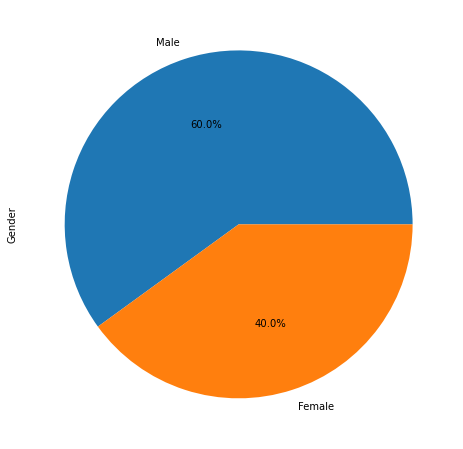

In [5]:
Gender = df['Gender'].value_counts()
Gender.plot(kind='pie',autopct='%.1f%%',figsize=(8,8))

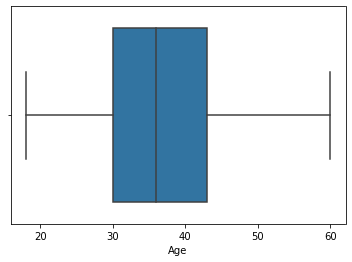

In [6]:
Age = sns.boxplot(x='Age',data=df)
plt.show()

<AxesSubplot:ylabel='Attrition'>

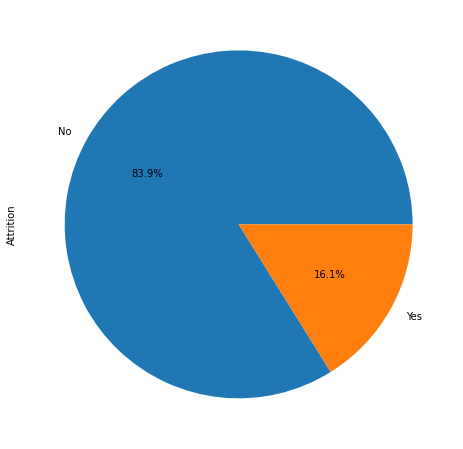

In [7]:
attr = df['Attrition'].value_counts()
attr.plot(kind='pie',autopct='%.1f%%',figsize=(8,8))

<AxesSubplot:>

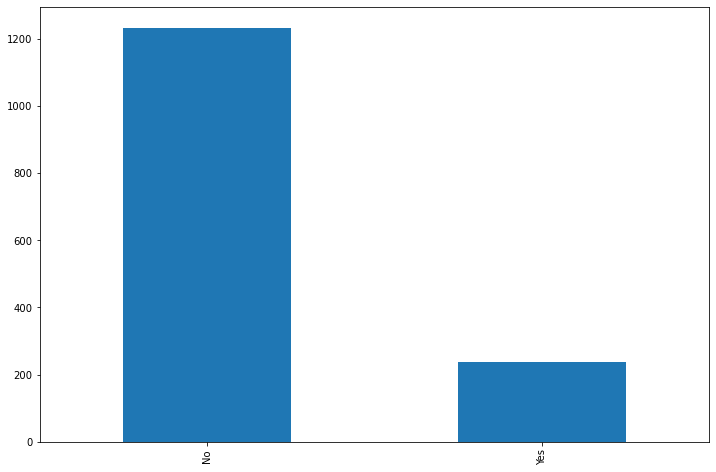

In [8]:
attr = df['Attrition'].value_counts()
attr.plot(kind='bar',figsize=(12,8))

In [9]:
attr = df['Attrition'].value_counts()
attr

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
attr = df['Attrition'].value_counts()
attr

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
#most staffs are likely to work with the company

# 2. FEATURE SELECTION USING MULTIVARIATE ANALYSIS

# Is Age Affected Attrition?

In [12]:
ageatt = df.groupby('Attrition',as_index=False)['Age'].median()
ageatt.round(2)

,Attrition,Age
0,No,36.0
1,Yes,32.0


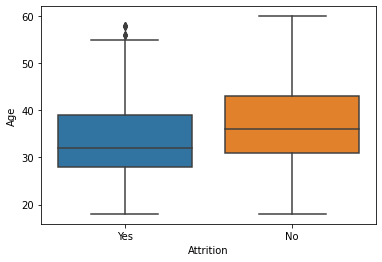

In [13]:
sns.boxplot(x='Attrition',
    y='Age',data=df)
plt.show()

In [14]:
#Create Hipotesis
#H0-There is no significant between Age and Attrition if p-value > 0.05
#H1 - There is Significant between Age and Attrition if p-value < 0.05

In [15]:
stats.levene(df['Age'][df['Attrition']=='Yes'],
             df['Age'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)

In [16]:
stats.ttest_ind(df['Age'][df['Attrition']=='Yes'],
             df['Age'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

In [17]:
# p-value is below than 0.05
# Accept H1, Rejct H0
# There is Significant between Age and Attrition
# Age Affected Attrition

In [18]:
df.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvSatisfaction', 'Gender', 'JobRole',
       'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

# Is BusinessTravel Affected Attrition?

In [19]:
msatt = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition'])
msatt

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [20]:
df = df[['Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvSatisfaction', 'Gender', 'JobRole',
       'MaritalStatus', 'PerformanceRating', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime', 'Attrition']]
    
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


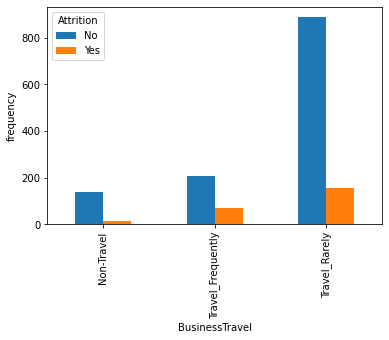

In [21]:
msatt.plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [22]:
#Create Hipotesis
#H0-There is no significant between BusinessTravel and Attrition if p-value > 0.05
#H1 - There is Significant between BusinessTravel and Attrition if p-value < 0.05

In [23]:
c, p, dof, expected = stats.chi2_contingency(msatt)
p

5.608614476449931e-06

In [24]:
#p-value is below than 0.05
#H1 - There is Significant between BusinessTravel and Attrition
#BusinessTravel Affected Attrition

# Is MonthlyIncome Affected Attrition?

In [25]:
miatt = df.groupby('Attrition',as_index=False)['MonthlyIncome'].median()
miatt.round(2)

,Attrition,MonthlyIncome
0,No,5204.0
1,Yes,3202.0


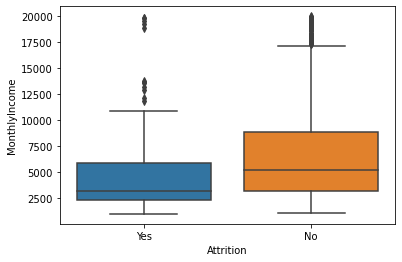

In [26]:
sns.boxplot(x='Attrition',
    y='MonthlyIncome',data=df)
plt.show()

In [27]:
miatt.describe()

,MonthlyIncome
count,2.000000
mean,4203.000000
std,1415.627776
min,3202.000000
25%,3702.500000
50%,4203.000000
75%,4703.500000
max,5204.000000


In [28]:
#Create Hipotesis
#H0-There is no significant between MonthlyIncome and Attrition if p-value > 0.05
#H1 - There is Significant between MonthlyIncome and Attrition if p-value < 0.05

In [29]:
stats.levene(df['MonthlyIncome'][df['Attrition']=='Yes'],
             df['MonthlyIncome'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)

In [30]:
stats.ttest_ind(df['MonthlyIncome'][df['Attrition']=='Yes'],
             df['MonthlyIncome'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)

In [31]:
#p-value is below than 0.05
#H1 - There is Significant between MonthlyIncome and Attrition
#MonthlyIncome Affected Attrition

In [32]:
gatt = pd.crosstab(index=df['Gender'],columns=df['Attrition'])
gatt

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


# Is JobSatisfaction affected Attrition?

In [33]:
jsatt = df.groupby('Attrition',as_index=False)['JobSatisfaction'].mean()
jsatt

,Attrition,JobSatisfaction
0,No,2.778589
1,Yes,2.468354


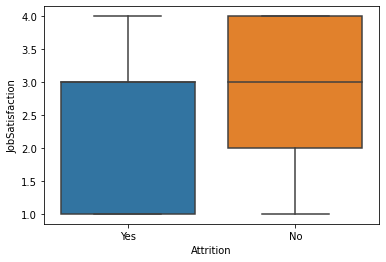

In [34]:
sns.boxplot(x='Attrition',
    y='JobSatisfaction',data=df)
plt.show()

In [35]:
#Create a hipotesis
# H0 - There is no significant between JobSatisfaction and Attrition 
# h1 - There is a significant between JobSatisfaction and Attrition

In [36]:
stats.levene(df['JobSatisfaction'][df['Attrition']=='Yes'],
             df['JobSatisfaction'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=2.4265959250716285, pvalue=0.11950724122969081)

In [37]:
stats.ttest_ind(df['JobSatisfaction'][df['Attrition']=='Yes'],
             df['JobSatisfaction'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05)

In [38]:
# Accept H1, Reject H0
# There is significant between JobSatisfaction and Attrition
# JobSatisfaction affected Attrition

# Is Bonus Affected Attrition?

In [39]:
bonus = df.groupby('Attrition',as_index=False)['Bonus'].median()
bonus.round(2)

,Attrition,Bonus
0,No,16131.0
1,Yes,10392.0


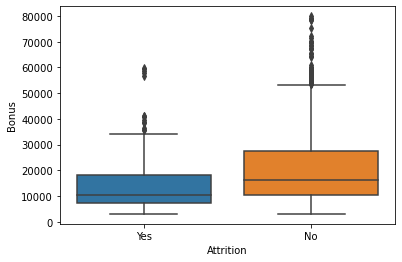

In [40]:
sns.boxplot(x='Attrition',y='Bonus',data=df)
plt.show()

In [41]:
#Create a hipotesis
# H0 - There is no significant between JobSatisfaction and Attrition if p-value > 0.05
# h1 - There is a significant between JobSatisfaction and Attrition if p-value < 0.05

In [42]:
stats.levene(df['Bonus'][df['Attrition']=='Yes'],
             df['Bonus'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=31.611860459322592, pvalue=2.2502347973082613e-08)

In [43]:
stats.ttest_ind(df['JobSatisfaction'][df['Attrition']=='Yes'],
             df['JobSatisfaction'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=-3.9261129248238826, pvalue=0.0001052049107397441)

In [44]:
# Accept H1, Reject H0
# There is significant between Bonus and Attrition
# Bonus affected Attrition

# Is Department Affected Attrition?

In [45]:
dpatt = pd.crosstab(index=df['Department'],columns=df['Attrition'])
dpatt

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


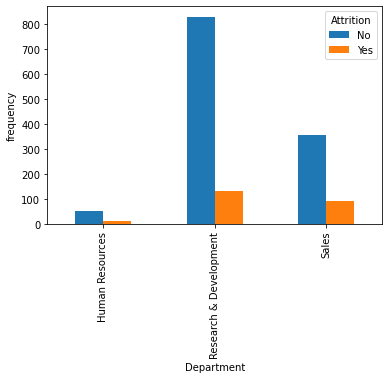

In [46]:
dpatt.plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [47]:
#Create Hipotesis
#H0-There is no significant between Department and Attrition if p-value > 0.05
#H1 - There is Significant between Department and Attrition if p-value < 0.05

In [48]:
c, p, dof, expected = stats.chi2_contingency(dpatt)
p

0.004525606574479633

In [49]:
#Accept H1, Reject H0
#There is Significant between Department and Attrition
# Department Affected Attrition

In [50]:
dfhatt = df.groupby('Attrition',as_index=False)['DistanceFromHome'].median()
dfhatt.round(2)

,Attrition,DistanceFromHome
0,No,7.0
1,Yes,9.0


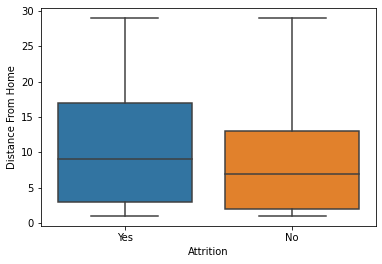

In [51]:
sns.boxplot(x='Attrition',y='DistanceFromHome',data=df)
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

In [52]:
#Create a hipotesis
# H0 - There is no significant between DistanceFromHome and Attrition if p-value > 0.05
# h1 - There is a significant between DistanceFromHome and Attrition if p-value < 0.05

In [53]:
stats.levene(df['DistanceFromHome'][df['Attrition']=='Yes'],
             df['DistanceFromHome'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=4.974146689763782, pvalue=0.025879557896104303)

In [54]:
stats.ttest_ind(df['DistanceFromHome'][df['Attrition']=='Yes'],
             df['DistanceFromHome'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

In [55]:
#p-value is below than 0.05
#Accept H1, Reject H0
#There is a significant between DistanceFromHome and Attrition
#DistanceFromHome Affected Attrition

In [56]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

# Is Education Affected Attrition?

In [57]:
eduatt = df.groupby('Attrition',as_index=False)['Education'].mean()
eduatt.round(2)

,Attrition,Education
0,No,2.93
1,Yes,2.84


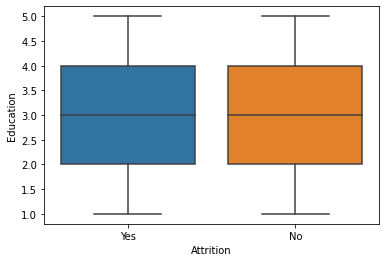

In [58]:
sns.boxplot(x='Attrition',y='Education',data=df)
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.show()

In [59]:
#Create a hipotesis
# H0 - There is no significant between Education and Attrition if p-value > 0.05
# h1 - There is a significant between Education and Attrition if p-value < 0.05

In [60]:
stats.levene(df['Education'][df['Attrition']=='Yes'],
             df['Education'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=0.00022455319863884266, pvalue=0.9880461043703124)

In [61]:
stats.ttest_ind(df['Education'][df['Attrition']=='Yes'],
             df['Education'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-1.202625515508589, pvalue=0.2293152033223043)

In [62]:
#p-value is greater than 0.05
#accept H0, Reject H1
#There is no significant between Education and Attrition
#Education Not Affected Attrition

# Is EducationField Affected Attrition?

In [63]:
efatt = pd.crosstab(index=df['EducationField'],columns=df['Attrition'])
efatt.round(2)

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


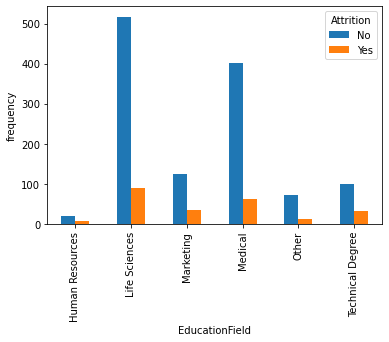

In [64]:
efatt.plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [65]:
#Create a hipotesis
# H0 - There is no significant between EducationField and Attrition if p-value > 0.05
# h1 - There is a significant between EducationField and Attrition if p-value < 0.05

In [66]:
c, p, dof, expected = stats.chi2_contingency(efatt)
p

0.006773980139025212

In [67]:
# p-value is below than 0.05
# accept H1, Reject H0
# There is a significant between EducationField and Attrition
# EducationField Affected Attrition

# Is EnvSatisfaction Affected Attrition?

In [68]:
eduatt = df.groupby('Attrition',as_index=False)['EnvSatisfaction'].mean()
eduatt.round(2)

,Attrition,EnvSatisfaction
0,No,2.77
1,Yes,2.46


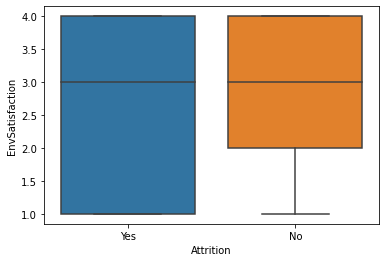

In [69]:
sns.boxplot(x='Attrition',y='EnvSatisfaction',data=df)
plt.xlabel('Attrition')
plt.ylabel('EnvSatisfaction')
plt.show()

In [70]:
#Create a hipotesis
# H0 - There is no significant between EnvSatisfaction and Attrition if p-value > 0.05
# h1 - There is a significant between EnvSatisfaction and Attrition if p-value < 0.05

In [71]:
stats.levene(df['EnvSatisfaction'][df['Attrition']=='Yes'],
             df['EnvSatisfaction'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=13.678094134249502, pvalue=0.00022496812287863818)

In [72]:
stats.ttest_ind(df['EnvSatisfaction'][df['Attrition']=='Yes'],
             df['EnvSatisfaction'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=-3.7512571857971873, pvalue=0.0002092053345883392)

In [73]:
# p-value is below than 0.05
# accept H1, Reject H0
# There is a significant between EnvSatisfaction and Attrition
# EnvSatisfaction Affected Attrition

In [74]:
genderatt = pd.crosstab(index=df['Gender'],columns=df['Attrition'])
genderatt

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


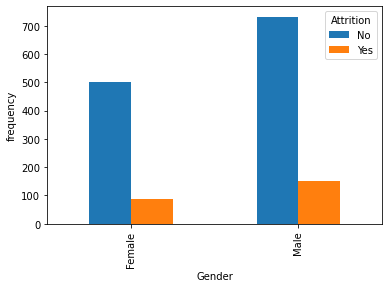

In [75]:
genderatt.plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [76]:
#Create a hipotesis
# H0 - There is no significant between Gender and Attrition if p-value > 0.05
# h1 - There is a significant between Gender and Attrition if p-value < 0.05

In [77]:
c, p, dof, expected = stats.chi2_contingency(genderatt)
p

0.29057244902890855

In [78]:
# p-value is greater than 0.05
# Accept H0, reject H1
# There is no significant between Gender and Attrition
# Gender Not Affected Attrition

# Is JobRole Affected Attrition?

In [79]:
jratt = pd.crosstab(index=df['JobRole'],columns=df['Attrition'])
jratt

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


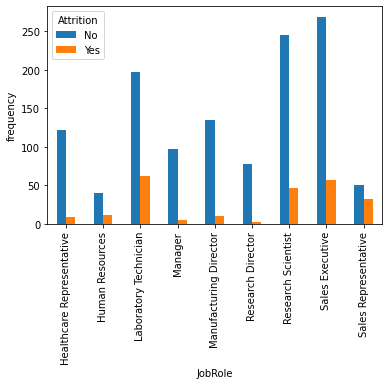

In [80]:
jratt.plot(kind='bar')
plt.ylabel('frequency')
plt.show()

In [81]:
#Create a hipotesis
# H0 - There is no significant between JobRole and Attrition if p-value > 0.05
# h1 - There is a significant between JobRole and Attrition if p-value < 0.05

In [82]:
c, p, dof, expected = stats.chi2_contingency(jratt)
p

2.752481638050657e-15

In [83]:
# p-value is below than 0.05
# Accept H1, Reject H0
# There is a significant between JobRole and Attrition
# JobRole Affected Attrition

# Is Marital Status Affected Attrition?

In [84]:
msatt = pd.crosstab(index=df['MaritalStatus'],columns=df['Attrition'])
msatt

Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


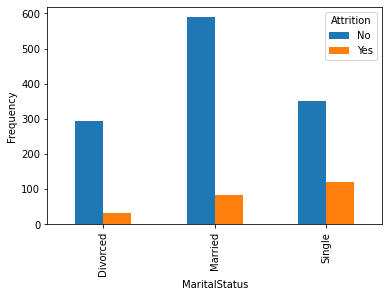

In [85]:
msatt.plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [86]:
#Create a hipotesis
# H0 - There is no significant between MaritalStatus and Attrition if p-value > 0.05
# h1 - There is a significant between MaritalStatus and Attrition if p-value < 0.05

In [87]:
c, p, dof, expected = stats.chi2_contingency(msatt)
p

9.45551106034083e-11

In [88]:
# p-value is below than 0.05
# Accept H1, Reject H0
# There is a significant between MaritalStatus and Attrition
# MaritalStatus Affected Attrition

# Is PerformanceRating Affected Attrition?

In [89]:
pratt = df.groupby('Attrition',as_index=False)['PerformanceRating'].mean()
pratt.round(2)

,Attrition,PerformanceRating
0,No,3.15
1,Yes,3.16


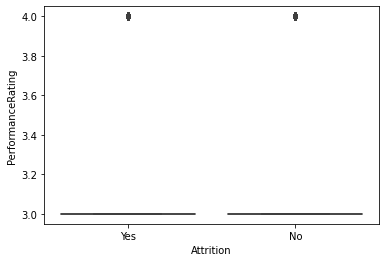

In [90]:
sns.boxplot(x='Attrition',y='PerformanceRating',data=df)
plt.show()

In [91]:
#Create a hipotesis
# H0 - There is no significant between PerformanceRating and Attrition if p-value > 0.05
# h1 - There is a significant between PerformanceRating and Attrition if p-value < 0.05

In [92]:
stats.levene(df['PerformanceRating'][df['Attrition']=='Yes'],
             df['PerformanceRating'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=0.048731447008135365, pvalue=0.8253162347750427)

In [93]:
stats.ttest_ind(df['PerformanceRating'][df['Attrition']=='Yes'],
             df['PerformanceRating'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=0.11068150493295091, pvalue=0.9118840421069003)

In [94]:
# p-value is greater than 0.05
# Accept H0, Reject H1
# There is no significant between PerformanceRating and Attrition
# PerformanceRating Not Affected Attrition

# Is TrainingTimesLastYear Affected Attrition?

In [95]:
trainatt = df.groupby('Attrition',as_index=False)['TrainingTimesLastYear'].mean()
trainatt.round(2)

,Attrition,TrainingTimesLastYear
0,No,2.83
1,Yes,2.62


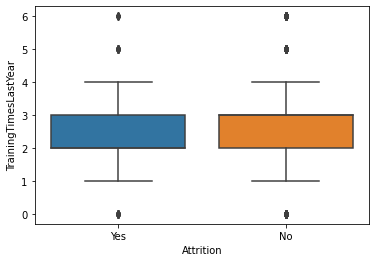

In [96]:
sns.boxplot(x='Attrition',y='TrainingTimesLastYear',data=df)
plt.show()

In [97]:
stats.levene(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
             df['TrainingTimesLastYear'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=0.0009627467164361536, pvalue=0.9752512997636223)

In [98]:
stats.ttest_ind(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
             df['TrainingTimesLastYear'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-2.2829029923666897, pvalue=0.02257849973720126)

In [99]:
# p-value is below than 0.05
# Accept H1, Reject H0
# There is a significant between TrainingTimesLastYear and Attrition
# TrainingTimesLastYear Affected Attrition

# Is YearsAtCompany Affected Attrition?

In [100]:
yearsatt = df.groupby('Attrition',as_index=False)['YearsAtCompany'].median()
yearsatt.round(2)

,Attrition,YearsAtCompany
0,No,6.0
1,Yes,3.0


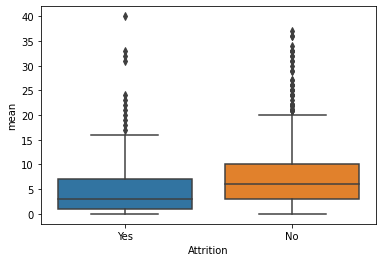

In [101]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)
plt.ylabel('mean')
plt.show()

In [102]:
stats.levene(df['YearsAtCompany'][df['Attrition']=='Yes'],
             df['YearsAtCompany'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)

In [103]:
stats.ttest_ind(df['YearsAtCompany'][df['Attrition']=='Yes'],
             df['YearsAtCompany'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

In [104]:
# p-value is below than 0.05
# Accept H1, Reject H0
# There is a significant between YearsAtCompany and Attrition
# YearsAtCompany Affected Attrition

# Is YearsSinceLastPromotion Affected Attrition?

In [105]:
yearspromoatt = df.groupby('Attrition',as_index=False)['YearsSinceLastPromotion'].mean()
yearspromoatt.round(2)

,Attrition,YearsSinceLastPromotion
0,No,2.23
1,Yes,1.95


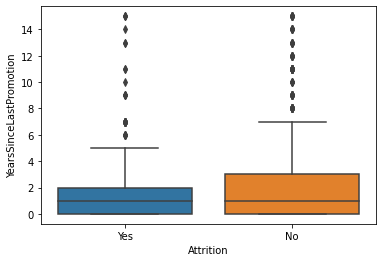

In [106]:
sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.show()

In [107]:
stats.levene(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             center='mean')

LeveneResult(statistic=1.2865078146687527, pvalue=0.25687769398884447)

In [108]:
stats.ttest_ind(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             df['YearsSinceLastPromotion'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

In [109]:
# p-value is greater than 0.05
# Accept H0, Reject H1
# There is no significant between YearsSinceLastPromotion and Attrition
# YearsSinceLastPromotion Not Affected Attrition

# Is OverTime Affected Attrition?

In [110]:
ot = pd.crosstab(index=df['OverTime'],columns=df['Attrition'])
ot


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


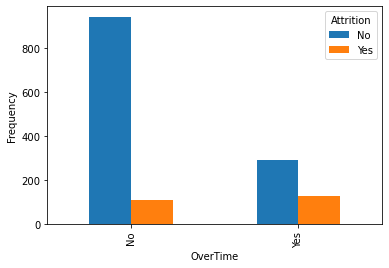

In [111]:
ot.plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

In [112]:
#Create a hipotesis
# H0 - There is no significant between OverTime and Attrition if p-value > 0.05
# h1 - There is a significant between OverTime and Attrition if p-value < 0.05

In [113]:
c, p, dof, expected = stats.chi2_contingency(ot)
p

8.15842372153832e-21

#### p-value is below than 0.05
#### Accept H1, Reject H0
#### There is a significant between OverTime and Attrition
#### OverTime Affected Attrition

# CREATE NEW DATAFRAME

In [114]:
df = df[['Age', 'BusinessTravel', 'MonthlyIncome',
       'JobSatisfaction', 'Bonus', 'Department', 'DistanceFromHome',
        'EducationField', 'EnvSatisfaction', 'JobRole',
       'MaritalStatus', 'TrainingTimesLastYear',
       'YearsAtCompany', 'OverTime', 'Attrition']]
    
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No,No


# Assign Input and Output

In [115]:
#Arranging data to input & output
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [116]:
x = pd.get_dummies(x,drop_first=True)

In [117]:
x

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,5993,4,17979,1,2,0,6,0,1,...,0,0,0,0,0,1,0,0,1,1
1,49,5130,2,20520,8,3,3,10,1,0,...,0,0,0,0,1,0,0,1,0,0
2,37,2090,3,6270,2,4,3,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,33,2909,3,8727,3,4,3,8,1,0,...,0,0,0,0,1,0,0,1,0,1
4,27,3468,2,10404,2,1,3,2,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571,4,7713,23,3,3,5,1,0,...,1,0,0,0,0,0,0,1,0,0
1466,39,9991,1,29973,6,4,5,7,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,6142,2,24568,4,2,0,6,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,49,5390,2,16170,2,4,3,9,1,0,...,0,0,0,0,0,1,0,1,0,0


In [118]:
#Partitioning dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [119]:
#Scaling dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [120]:
x_train

array([[ 1.62586005,  2.62759309,  0.27573851, ..., -0.918292  ,
         1.44171219,  1.56806362],
       [-0.32938399, -0.08356796,  0.27573851, ..., -0.918292  ,
         1.44171219, -0.63772923],
       [ 1.62586005,  0.39968402, -0.62751633, ..., -0.918292  ,
         1.44171219,  1.56806362],
       ...,
       [ 0.32236402, -0.48166355, -0.62751633, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [-0.00350998,  0.60691186,  0.27573851, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [ 0.21373936,  1.18056384,  1.17899336, ..., -0.918292  ,
        -0.69361972, -0.63772923]])

In [ ]:
#import function from sklearn packages
from sklearn.linear_model import LogisticRegression

#Create LR classifier
class_model = LogisticRegression(random_state=0)

#Train the algorithm
class_model.fit(x_train,y_train)

In [ ]:
###Train Naive Bayes Algorithm
#import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
class_model = GaussianNB()

#Train the model using the training sets
class_model.fit(x_train,y_train)

In [ ]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
class_model = RandomForestClassifier(n_estimators = 10,random_state = 0)
class_model.fit(x_train, y_train)

In [122]:
x_test = scaler.transform(x_test)

In [123]:
#Apply the model with x_test
y_pred = class_model.predict(x_test)

In [124]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No

In [125]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #create dataframe
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(15)

,Actual,Predicted
899,No,No
610,No,No
667,Yes,No
857,Yes,No
1063,No,No
1022,No,No
665,No,No
840,No,No
796,Yes,No
1221,No,No


In [126]:
#Performance Validation summarize in confusion matrix
pd.crosstab(y_pred,y_test)

Attrition,No,Yes
row_0,,
No,244,44
Yes,3,3


In [127]:
#Precision & sensitivity/recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.85      0.99      0.91       247
         Yes       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294



In [128]:
# overallperformance of the logistic model is able to predict the output at 85% accuracy
# Precision at 86% chances of staff will stay to work with company
# Recall at 99% 
# model is perform  better to predict No Class

<AxesSubplot:>

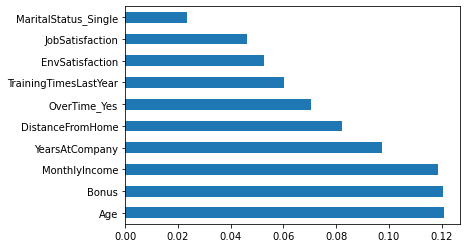

In [129]:
important_features = pd.Series(class_model.feature_importances_, index=x.columns)
important_features.nlargest(10).plot(kind='barh')